<a href="https://colab.research.google.com/github/hishaam19/RockID/blob/TrainingModelsAlex/RoughOrPolishedModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip '/content/drive/MyDrive/RoughOrPolishedTrain.zip'




Streaming output truncated to the last 5000 lines.
  inflating: RoughOrPolishedTrain/train/rough/rough_4757.jpg  
  inflating: RoughOrPolishedTrain/train/rough/rough_4758.jpg  
  inflating: RoughOrPolishedTrain/train/rough/rough_4759.jpg  
  inflating: RoughOrPolishedTrain/train/rough/rough_476.jpg  
  inflating: RoughOrPolishedTrain/train/rough/rough_4760.jpg  
  inflating: RoughOrPolishedTrain/train/rough/rough_4761.jpg  
  inflating: RoughOrPolishedTrain/train/rough/rough_4762.jpg  
  inflating: RoughOrPolishedTrain/train/rough/rough_4763.jpg  
  inflating: RoughOrPolishedTrain/train/rough/rough_4764.jpg  
  inflating: RoughOrPolishedTrain/train/rough/rough_4765.jpg  
  inflating: RoughOrPolishedTrain/train/rough/rough_4766.jpg  
  inflating: RoughOrPolishedTrain/train/rough/rough_4768.jpg  
  inflating: RoughOrPolishedTrain/train/rough/rough_477.jpg  
  inflating: RoughOrPolishedTrain/train/rough/rough_4770.jpg  
  inflating: RoughOrPolishedTrain/train/rough/rough_4771.jpg  
  infl

In [3]:


import keras
import tensorflow as tf
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import cv2
import os
from keras import layers
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,BatchNormalization,GlobalAveragePooling2D,regularization
from keras.models import Sequential
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras import regularizers
import seaborn as sns
print(tf. __version__)



2.12.0


In [6]:
img_width=224
img_height=224
batch_size=32
num_of_classes=17

TRAIN_DIR= "/content/RoughOrPolishedTrain/train"
TEST_DIR= "/content/RoughOrPolishedTrain/test"
VAL_DIR = "/content/RoughOrPolishedTrain/val"

In [7]:
#preprocessing datasets
train_data = ImageDataGenerator(
                                    rescale=1./255,

                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    vertical_flip=False,
                                    rotation_range=30 )


val_data = ImageDataGenerator(rescale=1./255)
test_data = ImageDataGenerator(rescale=1./255)

train_gen = train_data.flow_from_directory(TRAIN_DIR,
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True,
                                                target_size=(img_height, img_width))


val_gen = val_data.flow_from_directory(VAL_DIR,
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=False,
                                                target_size=(img_height, img_width))

test_gen = test_data.flow_from_directory(TEST_DIR,
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=False,
                                                target_size=(img_height, img_width))


"""val_gen=tf.keras.utils.image_dataset_from_directory(
    VAL_DIR,
    label_mode='categorical',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,

)
test_gen=tf.keras.utils.image_dataset_from_directory(
    TEST_DIR,
    label_mode='categorical',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,

)"""


Found 13953 images belonging to 2 classes.
Found 1744 images belonging to 2 classes.
Found 1745 images belonging to 2 classes.


"val_gen=tf.keras.utils.image_dataset_from_directory(\n    VAL_DIR,\n    label_mode='categorical',\n    batch_size=batch_size,\n    image_size=(img_height, img_width),\n    shuffle=True,\n\n)\ntest_gen=tf.keras.utils.image_dataset_from_directory(\n    TEST_DIR,\n    label_mode='categorical',\n    batch_size=batch_size,\n    image_size=(img_height, img_width),\n    shuffle=True,\n\n)"

In [8]:
model=Sequential()
pretrained_model=tf.keras.applications.MobileNetV2(include_top=False,
              weights='imagenet',
              input_shape=(img_height,img_width,3),pooling='max')
#for layer in pretrained_model.layers:
#  layer.trainable = True

num_layers_to_freeze = 75

for i, layer in enumerate(pretrained_model.layers):
    if i < num_layers_to_freeze:
        layer.trainable = False
    else:
        layer.trainable = True

#model.add(Dense(512,bias_regularizer='l1_l2',kernel_regularizer='l1_l2',activity_regularizer='l1_l2',activation='relu'))
model.add(pretrained_model)
#model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.45))
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.45))
model.add(Dense(2, activation='softmax'))

"""model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(70, activation='softmax'))"""


model.compile(optimizer=Adam(learning_rate=0.00001),
      loss='categorical_crossentropy',
      metrics =['accuracy'])

model.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1280)             2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 2048)              2623488   
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0   

In [16]:
#model = tf.keras.models.load_model('/content/drive/MyDrive/MobileNetRough.h5')

ModelCallbacks = [EarlyStopping(monitor='val_loss', patience=5,  restore_best_weights=True)]

history = model.fit(train_gen,epochs=10,verbose=1,validation_data=val_gen,callbacks=ModelCallbacks )

Epoch 1/10
437/437 [==============================] - 211s 483ms/step - loss: 23.7420 - accuracy: 0.9575 - val_loss: 23.0218 - val_accuracy: 0.9679
Epoch 2/10
437/437 [==============================] - 207s 475ms/step - loss: 22.3828 - accuracy: 0.9554 - val_loss: 21.6649 - val_accuracy: 0.9667
Epoch 3/10
437/437 [==============================] - 204s 466ms/step - loss: 21.0200 - accuracy: 0.9594 - val_loss: 20.3223 - val_accuracy: 0.9662
Epoch 4/10
437/437 [==============================] - 203s 464ms/step - loss: 19.6718 - accuracy: 0.9604 - val_loss: 18.9884 - val_accuracy: 0.9644
Epoch 5/10
437/437 [==============================] - 198s 452ms/step - loss: 18.3506 - accuracy: 0.9627 - val_loss: 17.6749 - val_accuracy: 0.9713
Epoch 6/10
437/437 [==============================] - 200s 457ms/step - loss: 17.0559 - accuracy: 0.9652 - val_loss: 16.4138 - val_accuracy: 0.9713
Epoch 7/10
437/437 [==============================] - 201s 460ms/step - loss: 15.8162 - accuracy: 0.9655 - val_l

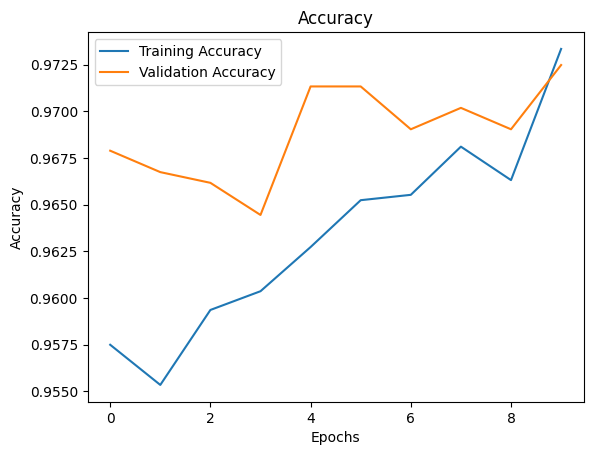

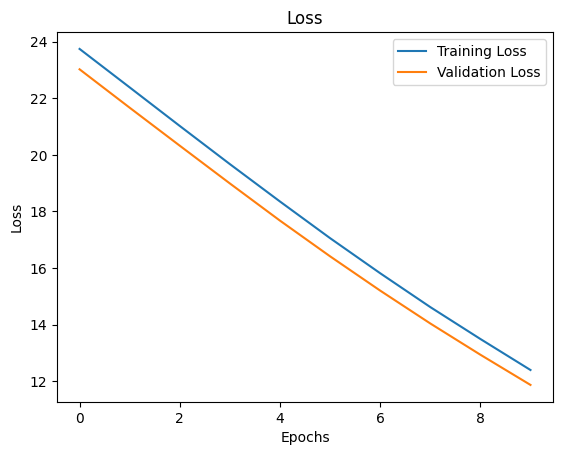

In [17]:
#Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Evaluate test data
55/55 [==============================] - 7s 123ms/step - loss: 11.8502 - accuracy: 0.9765
Test Loss: 11.850221633911133
Test Accuracy: 0.9765043258666992


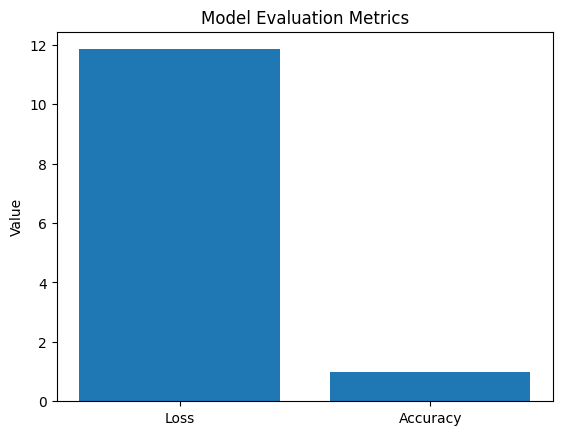

In [18]:
print("Evaluate test data")
#Save model
#tf.keras.saving.save_model("/content/sample_data/")


# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_gen)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Plot the evaluation metrics
metrics = ['Loss', 'Accuracy']
values = [test_loss, test_accuracy]

plt.bar(metrics, values)
plt.ylabel('Value')
plt.title('Model Evaluation Metrics')
plt.show()

In [19]:
model.save('/content/drive/MyDrive/MobileRoughOrPolished.h5')
model.save_weights('/content/drive/MyDrive/MobileNetRoughOrPolished.h5')
# Compute the confusion matrix

predictions = model.predict(test_gen)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_gen.classes

incorrectly_predicted_indices = np.where(predicted_labels != true_labels)[0]
incorrectly_predicted_labels = predicted_labels[incorrectly_predicted_indices]
true_labels_of_incorrect = true_labels[incorrectly_predicted_indices]


55/55 [==============================] - 7s 131ms/step


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1]
{'Polished': 0, 'rough': 1}


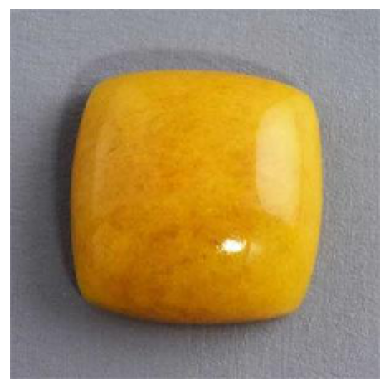

1/1 [==============================] - 0s 38ms/step
[[0.9928565  0.00714353]]
Maximum index: 0
0.9928565
The model is predicting this rock as: polished


In [20]:

classes=['polished','rough']


"""classes=['agate', 'alexandrite', 'amethyst', 'aquamarine', 'citrine',
         'diamond', 'emerald', 'garnet', 'jade', 'lapis Lazuli', 'moonstone',
 'morganite', 'opal', 'peridot', 'ruby', 'sapphire', 'tanzanite', 'topaz', 'turquoise']"""
print(true_labels_of_incorrect )
#model1 = tf.keras.models.load_model('gem79%1.h5')
label_dict = train_gen.class_indices
print(label_dict)
img = tf.keras.preprocessing.image.load_img('/content/RoughOrPolishedTrain/test/Polished/Polished_1366.jpg',
                                            target_size=(img_width, img_height))
img_array = tf.keras.preprocessing.image.img_to_array(img)
# Rescale the image array
img_array = img_array / 255.0
# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()
img_array = tf.expand_dims(img_array, axis=0)
#preprocessed_img = preprocess_input(img_array)
predictions = model.predict(img_array)
print(predictions)
max_index = np.argmax(predictions)
print("Maximum index:", max_index)
print(predictions[0][max_index])
print("The model is predicting this rock as:",classes[max_index])